In [73]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from os import listdir, getcwd
from os.path import isfile, join
ROOT_PATH=getcwd()
FOLDER_IMAGE="/plate-image/"
IMG_PATH="{}{}".format(ROOT_PATH, FOLDER_IMAGE)

In [42]:
def open_image(path):
    img = cv2.imread(path)
    return img

In [43]:
def convert_to_gray(img):
    img_gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    return img_gray

In [44]:
def noise_removal(img):
    noise_removal = cv2.bilateralFilter(img,9,75,75)
    return noise_removal

In [45]:
def equalize_histogram(img):
    equal_histogram = cv2.equalizeHist(img)
    return equal_histogram

In [46]:
def morph_image(img):
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
    morph_image = cv2.morphologyEx(img,cv2.MORPH_OPEN,kernel,iterations=15)
    return morph_image

In [47]:
def sub_morph(equal_histogram, morph_image):
    sub_morp_image = cv2.subtract(equal_histogram,morph_image)
    return sub_morp_image

In [48]:
def thresh_image(img):
    ret,thresh_image = cv2.threshold(img,110,100,cv2.THRESH_OTSU)
    return (ret, thresh_image)

In [62]:
def edge_detection(img):
    canny_image = cv2.Canny(img,250,255)
    canny_image = cv2.convertScaleAbs(canny_image)
    return canny_image

In [50]:
def image_dilation(img):
    kernel = np.ones((3,3), np.uint8)
    dilated_image = cv2.dilate(img,kernel,iterations=1)
    return dilated_image

In [88]:
def find_plate(base_img, dilated_image):
    new,contours, hierarchy = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    drawing = np.zeros(dilated_image.shape,np.uint8)
    contours= sorted(contours, key = cv2.contourArea, reverse = True)[:10]
    screenCnt = None
    # loop over our contours
    for cnt in contours:
        bx,by,bw,bh = cv2.boundingRect(cnt)
        if bw/bh > 2 and bw/bh < 3:
            (cx,cy),radius = cv2.minEnclosingCircle(cnt)
            cv2.rectangle(base_img,(bx,by),(bx+bw,by+bh),(255,0,0),3) # draw rectangle in blue color)
    return base_img

In [91]:
def detect_plate(path):
    img = open_image(path)
    img_gray = convert_to_gray(img)
    noise_removal_img = noise_removal(img_gray)
    equal_hist = equalize_histogram(noise_removal_img)
    morph_img = morph_image(equal_hist)
    sub_morp_img = sub_morph(equal_hist, morph_img)
    ret, thresh_img = thresh_image(sub_morp_img)
    canny_image = edge_detection(thresh_img)
    dilated_img = image_dilation(canny_image)
    return (find_plate(img, dilated_img))

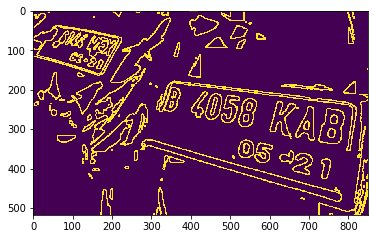

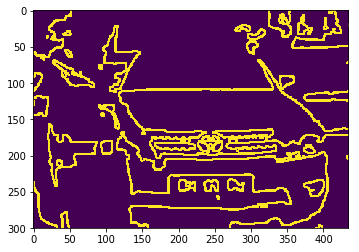

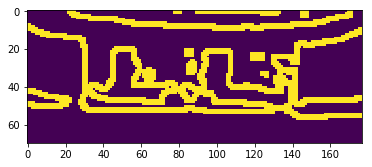

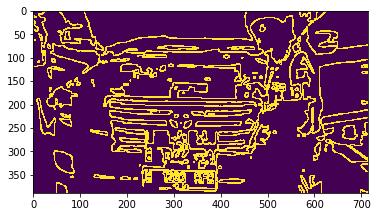

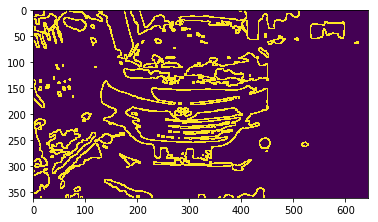

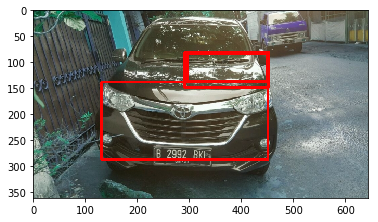

In [93]:
files = [f for f in listdir(IMG_PATH) if isfile(join(IMG_PATH, f))]

for file in files:
    FILE_IMG = "{}{}".format(IMG_PATH, file)
    plate = detect_plate(FILE_IMG)
    plt.figure()
    plt.imshow(plate)